In [15]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt     
from collections import Counter     # for majority voting in knn

In [16]:
file_path = r"C:\Users\shara\OneDrive\Desktop\ML ACTS\ML-Projects\KNN from numpy scratch\Iris.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print(df.describe())

print("\n\nMissing values\n", df.isnull().sum())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

In [17]:
# Separate features and target 
X = df.iloc[:, :-1].values   # all columns except label
y = df.iloc[:, -1].values   # label only

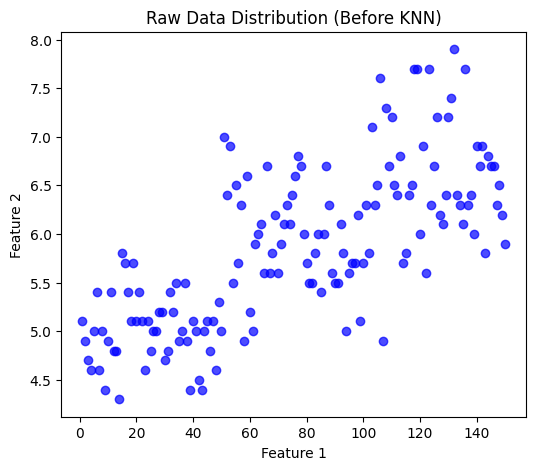

In [18]:
X_vis = X[:, :2]  # first two features only
plt.figure(figsize=(6, 5))
plt.scatter(
    X_vis[:, 0],   # Feature 1
    X_vis[:, 1],   # Feature 2
    color="blue",
    alpha=0.7
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Raw Data Distribution (Before KNN)")
plt.show()

In [19]:
# Custom train-test split function -Stratified = keeps class proportions same in train & test
# as KNN is sensitive to class imbalance
def train_test_split_stratified(X, y, test_size=0.5, random_state=42):
    np.random.seed(random_state) # fixes randomness
    classes = np.unique(y) # creates unique class lables ex-[0,1,2]
    train_idx, test_idx = [], []
    for c in classes:
        idx = np.where(y == c)[0] # Gets indices of samples belonging to class c
        np.random.shuffle(idx)
        split = int(len(idx) * test_size)
        test_idx.extend(idx[:split])
        train_idx.extend(idx[split:])
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

In [20]:
# Standardization(Z-score normalization) - as KNN is distance-based so Features must be on same scale
def standardize_train_test(X_train, X_test):
    mean = np.nanmean(X_train, axis=0)
    std  = np.nanstd(X_train, axis=0)
    # Handle zero OR NaN std
    std[(std == 0) | np.isnan(std)] = 1 # Prevents zero-division, NaN explosion and num instability
    return (X_train - mean) / std, (X_test - mean) / std

X_train, X_test = standardize_train_test(X_train, X_test)  #feature scaling

def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))   # Distance formula

In [ ]:
# KNN Class (from scratch)
class KNN:
    def __init__(self, k):
        self.k = k                          # Number of neighbors
    def fit(self, X, y): # lazy learner hence just stores data
        self.X_train = X                   # Store training features
        self.y_train = y                   # Store training labels
    def predict(self, X): # Calls _predict() internally
        return np.array([self._predict(x) for x in X])  # Predict for each sample
    def _predict(self, x): # abstraction is used _predict 
        distances = [dist(x, x_train) for x_train in self.X_train] # Compute distance from test point to all training points
        k_indices = np.argsort(distances)[:self.k] # Get indices of K nearest neighbors    
        k_labels = [self.y_train[i] for i in k_indices]# Get labels of K nearest neighbors
        return Counter(k_labels).most_common(1)[0][0]  # Majority voting


def accuracy(y_true, y_pred): # Accuracy
    return np.mean(y_true == y_pred)

In [22]:
knn = KNN(k=5) # train
knn.fit(X_train, y_train)
predictions = knn.predict(X_test) #predict
print("Accuracy:", accuracy(y_test, predictions))# Print accuracy

Accuracy: 0.9866666666666667


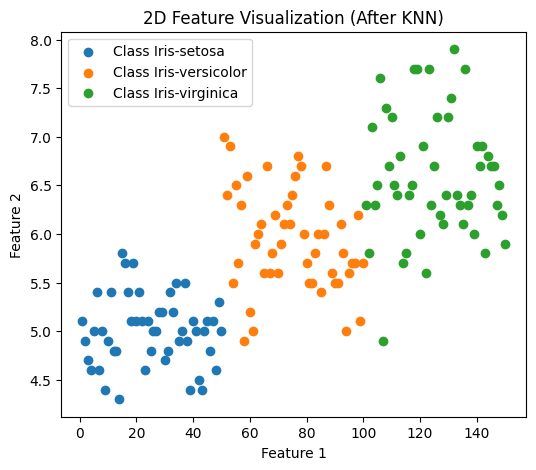

In [23]:
# Select only first two features for visualization
X_vis = X[:, :2]

# Create scatter plot
plt.figure(figsize=(6, 5))
for label in np.unique(y):
    plt.scatter(
        X_vis[y == label, 0],              # Feature 1
        X_vis[y == label, 1],              # Feature 2
        label=f"Class {label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Feature Visualization (After KNN)")
plt.legend()
plt.show()